<a href="https://colab.research.google.com/github/IsabelaAthayde/fuels-price-analysis/blob/main/trabalho_em_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Font size='15rem' color="lightgreen" /> <center>Projeto em Grupo</center>

In [ ]:
# Adicione as todas importações aqui

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

# Para criação de mapa
import geopandas as gpd

# Verifique se você já possui os arquivos antes de continuar

 1. <font color="green" size="4rem"/> Arquivos do df de preços

In [ ]:
import os
from google.colab import files

# Verificar se os arquivos já existem
arquivo_11 = '/content/precos-gasolina-etanol-11.csv'
arquivo_12 = '/content/precos-gasolina-etanol-12.csv'

if not (os.path.exists(arquivo_11) and os.path.exists(arquivo_12)):
    print("Seu colab não possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.\n")

    # Se o usuário não tiver os arquivos, fornecer links para download
    print("Clique nos links abaixo para baixar os arquivos:")

    link_11 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-11.csv'
    link_12 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-12.csv'

    print(f"1. Baixar 'precos-gasolina-etanol-11': {link_11}")
    print(f"2. Baixar 'precos-gasolina-etanol-12': {link_12}")
    print('\n-------------------------------------------\n')
    print('Ou Caso já possua os arquivos na sua máquina, selecione os arquivos:')

    uploaded = files.upload()
    # Após o upload, os arquivos podem ser manipulados no ambiente do Colab
else:
    print("Você já possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.")


Você já possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.


2. <font color="green" size="4rem"/>  Arquivo para o mapa do Brasil



In [ ]:
import os
from google.colab import files

# Verificar se os arquivos já existem
arquivos = ['/content/estados_2010.dbf', '/content/estados_2010.prj', '/content/estados_2010.qpj', '/content/estados_2010.shp', '/content/estados_2010.shx']

# Verificar se todos os arquivos existem
todos_existem = all(os.path.exists(arquivo) for arquivo in arquivos)

if (todos_existem):
    print("Você possuí todos os arquivos necessários no colab para rodar os mapas")
else:
  for arq in arquivos:
    if not (os.path.exists(arq)):
        print("Você não possuí o arquivo", arq)

  print(f"\n1. Por favor acesse o link do drive e baixe os arquivos que faltam ")
  print('https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1')
  print(f"2. Extraia os arquivos do zip/winrar, pegue os arquivos da pasta estados_2010 e o coloque todos eles dentro do colab")
  print('-------------------------------------------')



Você possuí todos os arquivos necessários no colab para rodar os mapas


# Recebendo os arquivos reais e concatenando

In [ ]:
# Arquivos dos dois últimos meses de 2023
nov = pd.read_csv('precos-gasolina-etanol-11.csv', sep=';')
dez = pd.read_csv('precos-gasolina-etanol-12.csv', sep=';')

# Junta os dois DataFrames
df = pd.concat([nov, dez])

# Visualize as primeiras linhas do DataFrame
display(df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,01/11/2023,"4,88",NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,01/11/2023,"6,19",NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,01/11/2023,"6,29",NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,29/12/2023,"5,79",NaN,R$ / litro,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,29/12/2023,"3,79",NaN,R$ / litro,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,29/12/2023,"5,49",NaN,R$ / litro,RODOIL
49451,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA ADITIVADA,29/12/2023,"5,59",NaN,R$ / litro,RODOIL


# Tratamentos

- <font color = "darkblue"> Removendo nulos da coluna valor de compra

In [ ]:
df.drop(columns=['Valor de Compra'], inplace=True)

- <font color = "darkblue"> Transformando a data de object para datetime

In [ ]:
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')

- <font color = "darkblue"> mudar valor de venda object type para float

In [ ]:
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')))

- <font color = "darkblue"> Verificando valores nulos em todo o DataFrame
<!-- -!Visualizar boxplots é uma maneira eficaz de identificar outliers -->

In [ ]:
# Verificar valores nulos em todo o DataFrame
valores_nulos_totais = df.isnull()

# Exibir o DataFrame de booleanos (True para valores nulos, False para valores não nulos)
print(valores_nulos_totais)

- <font color = "darkblue">Verificando se há duplicatas

In [ ]:
#Se todas as entradas são False, isso significa que não há duplicatas no DataFrame.
duplicatas = df.duplicated()
print(duplicatas)

<font color="red" size="7rem"> Perguntas a serem respondidas </font>

*<font color="red" size="5rem"> Isabela:</font>
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
------
* <font color="red" size="5rem">Ilma:</font>
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
-----
* <font color="red" size="5rem">Gabriel:</font>
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
-----
* <font color="red" size="5rem">Albino:</font>
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
11. Qual a média entre a Gasolina comum e a gasolina aditivada nesse período?
-----
* <font color="red" size="5rem">Debora:</font>
12. Qual é a variação percentual dos preços da gasolina e do etanol em cada estado durante os dois meses citados?
13. Qual é a relação entre o preço médio da gasolina e do etanol e o IDH (Índice de Desenvolvimento Humano) de cada estado?

-----------------------------------------------------------

-----------------------------------------------------------
  <center><font color="lightgreen" size="6rem" text-align="center"><font color="red">1, 2 e 3</font> Gráficos Concluídos! Análise em progresso </font></center>

----------------------------------------------------------


# <font color = "lightgreen"> 1- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

In [ ]:
# Defini a primeira semana de novembro como semana 1
df['Semana'] = (df['Data da Coleta'].dt.isocalendar().week - 44) % 52 + 1

# Cálculo da média semanal para cada produto
media_semanal = df.groupby(['Produto', 'Semana'])['Valor de Venda'].mean().reset_index()

# Junta os dados dos três produtos em um único dataframe
dados_semanais = pd.concat([media_semanal[media_semanal['Produto'] == produto] for produto in ['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL']])
dados_semanais.sort_index(ascending=True, inplace=True)

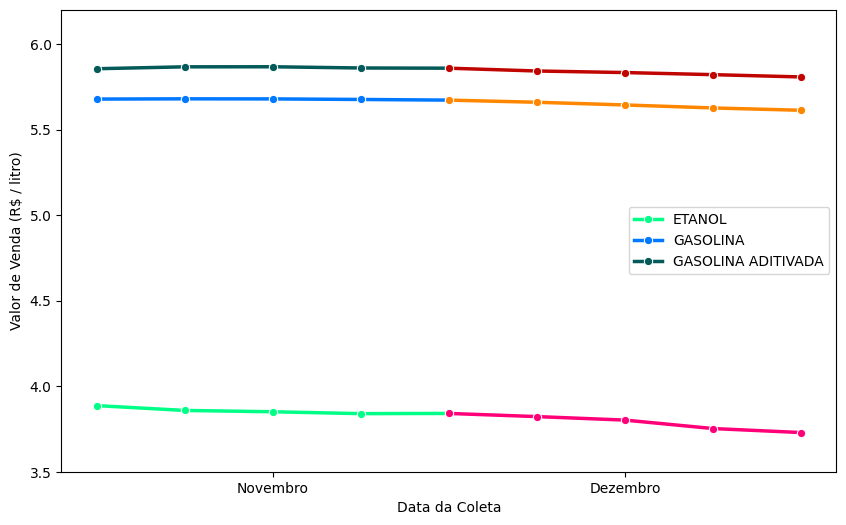

In [ ]:
# Dividi os dados como antes e depois da quinta semana
df_preco_alto = dados_semanais[dados_semanais['Semana'] <= 5]
df_preco_baixo = dados_semanais[dados_semanais['Semana'] >= 5]


# Paletas personalizadas
nov_palette = ['#00FF87','#0078FF','#045959']
dez_palette = ['#FF0078','#FF8700','#C00500']

# Remove duplicatas geradas na mudança de cor
produtos = df_preco_alto['Produto'].unique()

plt.figure(figsize=(10, 6))

for i, produto in enumerate(produtos):
    sns.lineplot(x='Semana', y='Valor de Venda', data=df_preco_alto[df_preco_alto['Produto'] == produto], color=nov_palette[i], label=produto, linewidth=2.5, marker='o')
    sns.lineplot(x='Semana', y='Valor de Venda', data=df_preco_baixo[df_preco_baixo['Produto'] == produto], color=dez_palette[i], label=None, linewidth=2.5, marker='o')

# Altera os rótulos do eixo x pra meses
plt.xticks(ticks=[3, 7], labels=['Novembro', 'Dezembro'])
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda (R$ / litro)')

# Defini o range min e max
plt.ylim(3.5, 6.2)
plt.show()


# <font color = "lightgreen"> 2- Qual o preço médio da gasolina e do etanol nesses dois meses?

In [ ]:
gas_nov = df[(df['Produto'] == 'GASOLINA') & (df['Data da Coleta'] >= '2023/11/01') & (df['Data da Coleta'] <= '2023/11/30') ]
gas_dez = df[(df['Produto'] == 'GASOLINA') & (df['Data da Coleta'] >= '2023/12/01') & (df['Data da Coleta'] <= '2023/12/30') ]

eta_nov = df[(df['Produto'] == 'ETANOL') & (df['Data da Coleta'] >= '2023/11/01') & (df['Data da Coleta'] <= '2023/11/30') ]
eta_dez = df[(df['Produto'] == 'ETANOL') & (df['Data da Coleta'] >= '2023/12/01') & (df['Data da Coleta'] <= '2023/12/30') ]

# Calculando a média
media_gas_nov = gas_nov['Valor de Venda'].mean()
media_gas_dez = gas_dez['Valor de Venda'].mean()

media_eta_nov = eta_nov['Valor de Venda'].mean()
media_eta_dez = eta_dez['Valor de Venda'].mean()

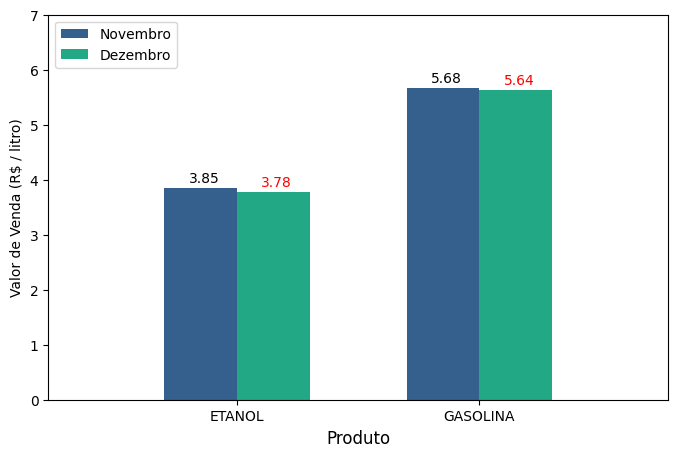

In [ ]:
# Defini os valores a serem usados no eixo x
produtos = ['ETANOL', 'GASOLINA']

# Defini a largura das barras
bar_largura = 0.30

# Defini a posição das barras de acordo com a largura predefinida
bar_m11 = np.arange(len(produtos))
bar_m12 = [x + bar_largura for x in bar_m11]

plt.figure(figsize=(8, 5))

# Cria o grafico de barras
plt.bar(bar_m11, [media_eta_nov, media_gas_nov], color=cm.viridis(0.3), width=0.30, label='Novembro')
plt.bar(bar_m12, [media_eta_dez, media_gas_dez], color=cm.viridis(0.6), width=0.30, label='Dezembro')

# Adiciona os valores nas barras
for i in range(len(bar_m11)):
    plt.text(x = bar_m11[i]-0.05 , y = [media_eta_nov, media_gas_nov][i]+0.1, s = format([media_eta_nov, media_gas_nov][i], '.2f'), size = 10)
    plt.text(x = bar_m12[i]-0.05 , y = [media_eta_dez, media_gas_dez][i]+0.1, s = format([media_eta_dez, media_gas_dez][i], '.2f'), size = 10, color='red')

# Adiciona os rótulos ao eixo x
plt.xlabel('Produto', fontsize=12)
plt.xticks([r + bar_largura/2 for r in range(len(produtos))], produtos)

# Adiciona o rótulo ao eixo y
plt.ylabel('Valor de Venda (R$ / litro)')
plt.ylim(0, 7)

# Adiciona margem no gráfico
plt.margins(x=0.3, y=0.3)

# Cria a legenda
plt.legend(loc='upper left')

# Mostra o gráfico
plt.show()


# <font color = "lightgreen"> 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?


O Mapa de calor feito com geopandas, um mapa de calor, com base no mapa do Brasil.

<font color="red" size="6rem">Para funcionar são necessários alguns arquivos da pasta estados_2010 que foram pedidos no tópico de **Verificação**</font>

In [ ]:
# Carrega o shapefile/ modelo do brasil e seus estados
brasil = gpd.read_file('estados_2010.shp')

df_media = df.copy()

# Renomeia as coluna de Estado para que não haja conflito entre dataframe
df_media = df_media.rename(columns={'Estado - Sigla': 'eSigla'})
brasil = brasil.rename(columns={'sigla': 'eSigla'})

# Agrupa por Sigla de Estado e Produto
df_media = df_media.groupby(['eSigla', 'Produto'])['Valor de Venda'].mean()

# Transforma a Series em dataframe
df_media = df_media.to_frame()

# Reseta o index
df_media.reset_index(inplace=True)

# Defini os indexes como eSigla
df_media = df_media.set_index('eSigla')
brasil = brasil.set_index('eSigla')

In [ ]:
# Filtra o dataFrame para incluir apenas 'Gasolina'
df_media_gasolina = df_media[df_media['Produto'] == 'GASOLINA']

# Filtra o dataFrame para incluir apenas 'Etanol'
df_media_etanol = df_media[df_media['Produto'] == 'ETANOL']

# Uni os dois DataFrames separadamente com o seu próprio mapa do Brasil
brasil_gasolina = brasil.join(df_media_gasolina)
brasil_etanol = brasil.join(df_media_etanol)

In [ ]:
# Dicionário com os ajustes individuais na posição dos Estados que estavam dispersos
# Cordenada padrão (-5, 2). Cordenada abaixo é usada pra o cálculo, ex: PA -> (-5-1 = -6, 2-1 = 1)
ajustes = {
    'PA': (-1, -1),
    'AM': (-3, -1),
    'AP': (0, -0.4),
    'RR': (-0.2, -0.2),
    'SP': (0, 0.5),
    'MA': (0, 1),
    'TO': (0, -1),
    'PI': (-0.5, -1),
    'PB': (1, 0),
    'AL': (1, 0),
    'BA': (1, 1),
    'MT': (-0.5, -0.5),
    'DF': (-0.2, 0.7),
    'AC': (1.4,-0.9)
}

In [ ]:
# Adiciona as siglas dos estados
def adicionar_sigla(pontos_centrais, index, top_5, ax):
# Pega o ponto e a sigla
  for ponto, sigla in zip(pontos_centrais, index):
      # Só escrevem as siglas se forem parte do top 5
      if sigla in top_5:
          # Inicia os ajustes das coordenadas, fazendo os cálculos necessários
          ajuste = ajustes.get(sigla, (0, 0))
          ax.annotate(sigla, xy=(ponto.x + ajuste[0], ponto.y + ajuste[1]), xytext=(-5, -2), textcoords="offset points")

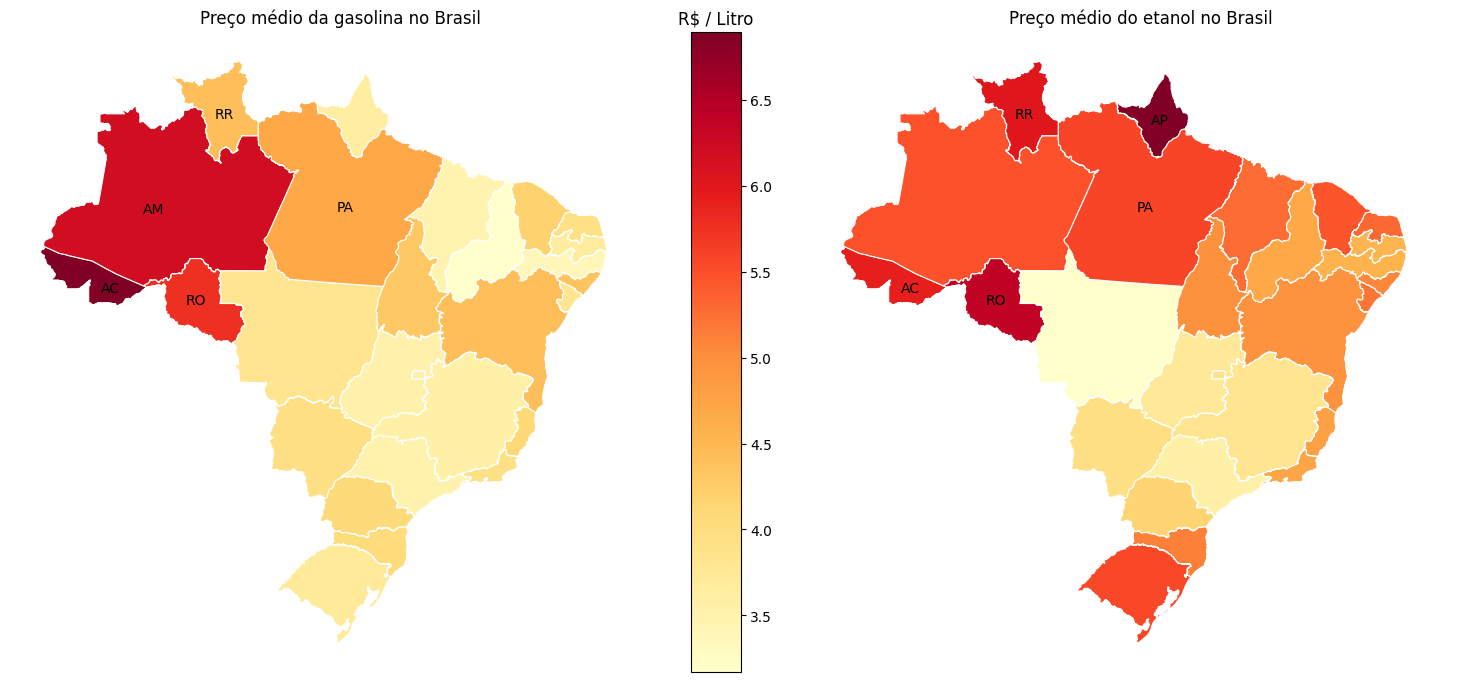

In [ ]:
# Ajusta o tamanho dos mapas do Brasil
fig = plt.figure(figsize=(25, 8))

# Cria os eixos para os dois mapas
ax1 = fig.add_axes([0.13, 0.1, 0.4, 0.8])  # 1º- mapa para gasolina
ax2 = fig.add_axes([0.45, 0.1, 0.4, 0.8])  # 2º- mapa para etanol

# Cria um terceiro eixo para a barra de cores
cax = fig.add_axes([0.47, 0.1, 0.02, 0.8])

# Armazena os pontos centrais aproximados dos Estados
pontos_centrais = brasil.geometry.representative_point()

# Plota o mapa da gasolina -1º
brasil_gasolina.plot(column='Valor de Venda', cmap='YlOrRd', linewidth=0.8, edgecolor='white', ax=ax1, legend=False)

# Plota o mapa para etanol - 2º
brasil_etanol.plot(column='Valor de Venda', cmap='YlOrRd', linewidth=0.8, edgecolor='white', ax=ax2, legend=False)

# Seleciona os 5 estados com os maiores valores e chama a função de adicionar sigla
top_5_estados_gas = df_media_gasolina.sort_values('Valor de Venda', ascending=False).head(5).index.tolist()
adicionar_sigla(pontos_centrais, brasil.index, top_5_estados_gas, ax1)

# Ordena os valores de etanol, seleciona os top 5 estados e chama a função
top_5_estados_eta = df_media_etanol.sort_values('Valor de Venda', ascending=False).head(5).index.tolist()
adicionar_sigla(pontos_centrais, brasil.index, top_5_estados_eta, ax2)

# Oculta os valores em x e y dos mapas 1 e 2
ax1.axis('off')
ax2.axis('off')

ax1.set_title('Preço médio da gasolina no Brasil')
ax2.set_title('Preço médio do etanol no Brasil')

# Criação da barra medidora de calor

# Fixa o mínimo e máximo
norm = mcolors.Normalize(vmin=df_media['Valor de Venda'].min(), vmax=df_media['Valor de Venda'].max())

# Escolhe a paleta entre tons amarelados e avermelhados
cmap = plt.get_cmap('YlOrRd')

# Instância necessária para a criação da barra no centro
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig.colorbar(sm, cax=cax, orientation='vertical')

# Título da barra
cax.set_title('R$ / Litro')

plt.show()

# <font color = "green"> Pergunta 12: Qual é a variação percentual dos preços da gasolina e do etanol em cada estado durante os dois meses citados?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Arquivos dos dois últimos meses de 2023
nov = pd.read_csv('/content/precos-gasolina-etanol-11 (2).csv', sep=';')
dez = pd.read_csv('/content/precos-gasolina-etanol-12 (1).csv', sep=';')

# Concatenando os dataframes
df = pd.concat([nov, dez])

# Verificando se 'Valor de Venda' é do tipo string
if df['Valor de Venda'].dtypes == object:
    # Substituindo vírgulas por pontos e convertendo para float
    df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

# Definindo as variáveis de preço de acordo com o valor de venda
df['preco_gasolina'] = df['Valor de Venda']
df['preco_etanol'] = df['Valor de Venda']

# Tratando valores None ou NaN e calculando a variação percentual dos preços
df['preco_gasolina'] = df['preco_gasolina'].fillna(method='ffill')
df['preco_etanol'] = df['preco_etanol'].fillna(method='ffill')
df['variacao_gasolina'] = df['preco_gasolina'].pct_change()
df['variacao_etanol'] = df['preco_etanol'].pct_change()

# Agrupando por estado e calcule a média
df_grouped = df.groupby('Estado - Sigla')[['variacao_gasolina', 'variacao_etanol']].mean()

# Criando um gráfico de barras para visualizar os resultados
ax = df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Variação percentual dos preços da gasolina e do etanol')
plt.ylabel('Variação percentual')
plt.show()









#Informações Gerais do DataFrame:
O DataFrame tem um total de 101.996 entradas (linhas). As colunas variam em termos de tipo de dados, incluindo principalmente objetos (strings) e um float64. Algumas colunas têm valores nulos, como "Numero Rua", "Complemento" e "Bairro". A coluna "Valor de Compra" parece ter todos os valores nulos. Possíveis Ações de Limpeza/Tratamento:

Valores Nulos: Pode ser necessário lidar com os valores nulos nas colunas "Numero Rua", "Complemento" e "Bairro". Dependendo do contexto, você pode preencher os valores nulos com informações apropriadas ou remover as linhas. Coluna "Valor de Compra": A coluna "Valor de Compra" parece estar completamente vazia. Se não for necessária, você pode considerar removê-la. Tipos de Dados: A coluna "Valor de Venda" está atualmente como objeto. Se ela contiver informações numéricas, pode ser útil convertê-la para um tipo de dados numérico, como float. Data da Coleta: Se a coluna "Data da Coleta" estiver como objeto, você pode convertê-la para o tipo de dados de data para facilitar análises temporais.

In [ ]:
import pandas as pd
import numpy as np

# Exemplo de dados (substitua isso pelos seus dados reais)
data = {
    'Estado': ['SP', 'RJ', 'MG', 'SP', 'RJ'],
    'Municipio': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro'],
    'Regiao': ['Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste'],
    'Bandeira': ['Shell', 'Petrobras', 'Ipiranga', 'Shell', 'Petrobras'],
    'Preco_Gasolina': [4.50, 4.60, 4.40, 4.55, 4.65],
    'Preco_Etanol': [3.00, 3.10, 2.90, 3.05, 3.15]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Agora você pode usar o DataFrame 'df' nos cálculos e análises mencionados no código anterior.

# Supondo que você tenha um DataFrame chamado 'df' com os dados dos combustíveis

# 1. Tendência de queda ou aumento nos preços dos combustíveis
tendencia_gasolina = df['Preco_Gasolina'].diff().mean()
tendencia_etanol = df['Preco_Etanol'].diff().mean()

# 2. Preço médio da gasolina e do etanol
preco_medio_gasolina = df['Preco_Gasolina'].mean()
preco_medio_etanol = df['Preco_Etanol'].mean()

# 3. Os 5 estados com os preços médios mais altos
estados_mais_caros_gasolina = df.groupby('Estado')['Preco_Gasolina'].mean().nlargest(5)
estados_mais_caros_etanol = df.groupby('Estado')['Preco_Etanol'].mean().nlargest(5)

# 4. Preço médio por estado
preco_medio_por_estado = df.groupby('Estado')[['Preco_Gasolina', 'Preco_Etanol']].mean()

# 5 e 6. Municípios com menor e maior preço
municipio_menor_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmin()]['Municipio']
municipio_menor_preco_etanol = df.loc[df['Preco_Etanol'].idxmin()]['Municipio']
municipio_maior_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmax()]['Municipio']
municipio_maior_preco_etanol = df.loc[df['Preco_Etanol'].idxmax()]['Municipio']

# 7 e 8. Região com maior e menor valor médio
regiao_maior_valor_gasolina = df.groupby('Regiao')['Preco_Gasolina'].mean().idxmax()
regiao_menor_valor_etanol = df.groupby('Regiao')['Preco_Etanol'].mean().idxmin()

# 9. Correlação entre preço e região
correlacao_regiao_gasolina = df['Preco_Gasolina'].corr(df['Regiao'])
correlacao_regiao_etanol = df['Preco_Etanol'].corr(df['Regiao'])

# 10. Correlação entre preço e bandeira
correlacao_bandeira_gasolina = df['Preco_Gasolina'].corr(df['Bandeira'])
correlacao_bandeira_etanol = df['Preco_Etanol'].corr(df['Bandeira'])

# Suas três perguntas adicionais aqui

print(f"1. Tendência de queda ou aumento nos preços da gasolina: {tendencia_gasolina}")
print(f"   Tendência de queda ou aumento nos preços do etanol: {tendencia_etanol}")
print(f"2. Preço médio da gasolina: {preco_medio_gasolina}")
print(f"   Preço médio do etanol: {preco_medio_etanol}")
print(f"3. Estados com os preços médios mais altos (gasolina): {estados_mais_caros_gasolina}")
print(f"   Estados com os preços médios mais altos (etanol): {estados_mais_caros_etanol}")
print(f"4. Preço médio por estado:\n{preco_medio_por_estado}")
print(f"5. Município com menor preço para gasolina: {municipio_menor_preco_gasolina}")
print(f"   Município com menor preço para etanol: {municipio_menor_preco_etanol}")
print(f"6. Município com maior preço para gasolina: {municipio_maior_preco_gasolina}")
print(f"   Município com maior preço para etanol: {municipio_maior_preco_etanol}")
print(f"7. Região com maior valor médio da gasolina: {regiao_maior_valor_gasolina}")
print(f"8. Região com menor valor médio do etanol: {regiao_menor_valor_etanol}")
print(f"9. Correlação entre preço e região (gasolina): {correlacao_regiao_gasolina}")
print(f"   Correlação entre preço e região (etanol): {correlacao_regiao_etanol}")
print(f"10. Correlação entre preço e bandeira (gasolina): {correlacao_bandeira_gasolina}")
print(f"    Correlação entre preço e bandeira (etanol): {correlacao_bandeira_etanol}")


In [ ]:
import pandas as pd
import numpy as np


data = {
    'Estado': ['SP', 'RJ', 'MG', 'SP', 'RJ'],
    'Municipio': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro'],
    'Regiao': ['Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste'],
    'Bandeira': ['Shell', 'Petrobras', 'Ipiranga', 'Shell', 'Petrobras'],
    'Preco_Gasolina': [4.50, 4.60, 4.40, 4.55, 4.65],
    'Preco_Etanol': [3.00, 3.10, 2.90, 3.05, 3.15]
}


df = pd.DataFrame(data)


# 1. Tendência de queda ou aumento nos preços dos combustíveis
tendencia_gasolina = df['Preco_Gasolina'].diff().mean()
tendencia_etanol = df['Preco_Etanol'].diff().mean()

# 2. Preço médio da gasolina e do etanol
preco_medio_gasolina = df['Preco_Gasolina'].mean()
preco_medio_etanol = df['Preco_Etanol'].mean()

# 3. Os 5 estados com os preços médios mais altos
estados_mais_caros_gasolina = df.groupby('Estado')['Preco_Gasolina'].mean().nlargest(5)
estados_mais_caros_etanol = df.groupby('Estado')['Preco_Etanol'].mean().nlargest(5)

# 4. Preço médio por estado
preco_medio_por_estado = df.groupby('Estado')[['Preco_Gasolina', 'Preco_Etanol']].mean()

# 5 e 6. Municípios com menor e maior preço
municipio_menor_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmin()]['Municipio']
municipio_menor_preco_etanol = df.loc[df['Preco_Etanol'].idxmin()]['Municipio']
municipio_maior_preco_gasolina = df.loc[df['Preco_Gasolina'].idxmax()]['Municipio']
municipio_maior_preco_etanol = df.loc[df['Preco_Etanol'].idxmax()]['Municipio']

# 7 e 8. Região com maior e menor valor médio
regiao_maior_valor_gasolina = df.groupby('Regiao')['Preco_Gasolina'].mean().idxmax()
regiao_menor_valor_etanol = df.groupby('Regiao')['Preco_Etanol'].mean().idxmin()

print(f"1. Tendência de queda ou aumento nos preços da gasolina: {tendencia_gasolina}")
print(f"   Tendência de queda ou aumento nos preços do etanol: {tendencia_etanol}")
print(f"2. Preço médio da gasolina: {preco_medio_gasolina}")
print(f"   Preço médio do etanol: {preco_medio_etanol}")
print(f"3. Estados com os preços médios mais altos (gasolina): {estados_mais_caros_gasolina}")
print(f"   Estados com os preços médios mais altos (etanol): {estados_mais_caros_etanol}")
print(f"4. Preço médio por estado:\n{preco_medio_por_estado}")
print(f"5. Município com menor preço para gasolina: {municipio_menor_preco_gasolina}")
print(f"   Município com menor preço para etanol: {municipio_menor_preco_etanol}")
print(f"6. Município com maior preço para gasolina: {municipio_maior_preco_gasolina}")
print(f"   Município com maior preço para etanol: {municipio_maior_preco_etanol}")
print(f"7. Região com maior valor médio da gasolina: {regiao_maior_valor_gasolina}")
print(f"8. Região com menor valor médio do etanol: {regiao_menor_valor_etanol}")